In [3]:
import os
import matplotlib.pyplot as plt
import collections


import numpy as np
import pandas as pd

In [4]:
KMNIST_DIR = "kmnist"

kmnist_files = sorted([os.path.join(KMNIST_DIR, filename) for filename in os.listdir(KMNIST_DIR) if filename.endswith("npz")])
kmnist_files

['kmnist/k49-test-imgs.npz',
 'kmnist/k49-test-labels.npz',
 'kmnist/k49-train-imgs.npz',
 'kmnist/k49-train-labels.npz']

In [5]:
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_test = load(kmnist_files[0])
y_test = load(kmnist_files[1])
x_train = load(kmnist_files[2])
y_train = load(kmnist_files[3])


In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((232365, 28, 28), (38547, 28, 28), (232365,), (38547,))

In [7]:
y_train[:5]

array([30, 19, 20, 30,  7], dtype=uint8)

In [8]:
kmnist_labelmap_file = sorted([os.path.join(KMNIST_DIR, filename) for filename in os.listdir(KMNIST_DIR) if filename.endswith("csv")])
df_map = pd.read_csv(kmnist_labelmap_file[0])
df_map

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


In [9]:
labels = df_map["char"].tolist()

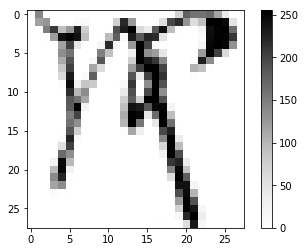

In [10]:
plt.figure()
plt.imshow(x_train[12], cmap='Greys')
plt.colorbar()
# plt.grid(False)
plt.show()

In [11]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

버전:  3.0.2
설치 위치:  /home/sc82choi/miniconda3/envs/tf20-alpha/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/sc82choi/.config/matplotlib
캐시 위치:  /home/sc82choi/.cache/matplotlib
설정파일 위치:  /home/sc82choi/miniconda3/envs/tf20-alpha/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
219


In [12]:
plt.style.use('ggplot')
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

# フォントパスを指定 .ttf 形式でないと駄目な模様, 関連：https://github.com/matplotlib/matplotlib/pull/3912
font_path = '/home/sc82choi/.local/share/fonts/Osaka.ttc'
fp = FontProperties(fname=font_path, size=14)

# get_name() で 'Osaka' が返ってきています。メソッドの代わりに = 'Osaka' としてもOK
rcParams['font.family'] = fp.get_name()

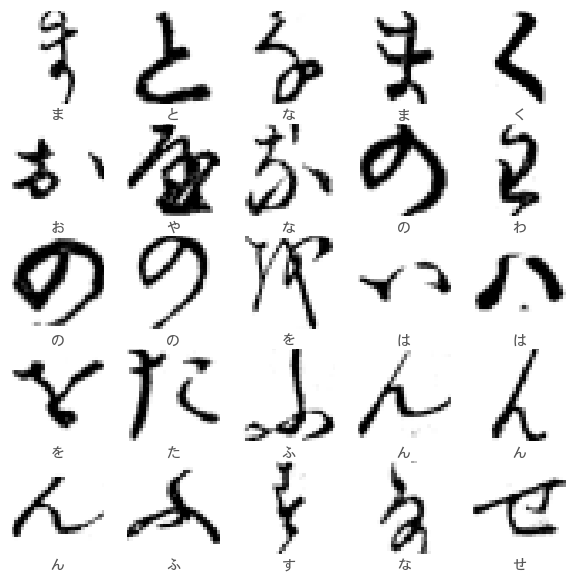

In [13]:



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]],  fontproperties=fp)
plt.show()

In [14]:
import tensorflow as tf

In [15]:
## Hyper parameters
batch_size = 2048

In [16]:
def prepare_features_and_labels(x, y):
    x = tf.cast(x, tf.float64) / 255.0
    y = tf.cast(y, tf.int8)
    return x, y

# df image_augmentation(x,y):    
#     brght_img = tf.reverse(tf_img, axis =[0]) #Verticle flipping
#     brght_img = tf.reverse(tf_img, axis =[1]) 
#     return

def mnist_train_dataset(images_npy, labels_npy, batch_size):
    ds = tf.data.Dataset.from_tensor_slices((images_npy, labels_npy))
    ds = ds.map(prepare_features_and_labels, num_parallel_calls=4 )
    ds = ds.shuffle(10000).repeat().batch(batch_size)
    return ds


def mnist_test_dataset(images_npy, labels_npy, batch_size=None):
    ds = tf.data.Dataset.from_tensor_slices((images_npy, labels_npy))
    ds = ds.map(prepare_features_and_labels)
    if batch_size is not None:
        ds = ds.shuffle(10000).repeat().batch(batch_size)
    else:
        ds = ds.repeat().batch(len(labels_npy))
    return ds

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
train_index, dev_index = next(sss.split(x_train, y_train))

train_index.shape, dev_index.shape

((197510,), (34855,))

In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = cc.fit_resample(x_train[train_index].reshape(-1, 28*28), y_train[train_index])
collections.Counter(y_resampled)

Counter({0: 333,
         1: 333,
         2: 333,
         3: 333,
         4: 333,
         5: 333,
         6: 333,
         7: 333,
         8: 333,
         9: 333,
         10: 333,
         11: 333,
         12: 333,
         13: 333,
         14: 333,
         15: 333,
         16: 333,
         17: 333,
         18: 333,
         19: 333,
         20: 333,
         21: 333,
         22: 333,
         23: 333,
         24: 333,
         25: 333,
         26: 333,
         27: 333,
         28: 333,
         29: 333,
         30: 333,
         31: 333,
         32: 333,
         33: 333,
         34: 333,
         35: 333,
         36: 333,
         37: 333,
         38: 333,
         39: 333,
         40: 333,
         41: 333,
         42: 333,
         43: 333,
         44: 333,
         45: 333,
         46: 333,
         47: 333,
         48: 333})

In [19]:
from tensorflow.keras.utils import to_categorical
train_dataset = mnist_train_dataset(x_train[train_index], y_train[train_index], batch_size)
val_dataset = mnist_test_dataset(x_train[dev_index], y_train[dev_index])
test_dataset = mnist_test_dataset(x_test,y_test)

In [20]:
# from tensorflow.keras.utils import to_categorical
# train_dataset = mnist_train_dataset(x_train[train_index], to_categorical(y_train[train_index]), batch_size)
# val_dataset = mnist_test_dataset(x_train[dev_index], to_categorical(y_train[dev_index]))
# test_dataset = mnist_test_dataset(x_test, to_categorical(y_test))

In [21]:
# train_dataset = mnist_train_dataset(X_resampled.reshape(-1,28,28), y_resampled, batch_size)
# val_dataset = mnist_test_dataset(x_train[dev_index], y_train[dev_index])
# test_dataset = mnist_test_dataset(x_test, y_test)

In [22]:
for row in val_dataset.take(5):
    print(collections.Counter(row[1].numpy().tolist()))

Counter({18: 900, 40: 900, 19: 900, 35: 900, 24: 900, 30: 900, 7: 900, 38: 900, 17: 900, 20: 900, 12: 900, 2: 900, 11: 900, 27: 900, 5: 900, 47: 900, 10: 900, 15: 900, 34: 900, 21: 900, 9: 900, 25: 900, 37: 900, 6: 900, 41: 900, 4: 900, 0: 900, 39: 900, 1: 900, 28: 900, 46: 900, 26: 770, 8: 707, 13: 625, 14: 580, 48: 528, 33: 509, 31: 459, 16: 385, 23: 368, 43: 360, 42: 321, 22: 309, 29: 299, 32: 258, 36: 240, 3: 116, 44: 62, 45: 59})
Counter({18: 900, 40: 900, 19: 900, 35: 900, 24: 900, 30: 900, 7: 900, 38: 900, 17: 900, 20: 900, 12: 900, 2: 900, 11: 900, 27: 900, 5: 900, 47: 900, 10: 900, 15: 900, 34: 900, 21: 900, 9: 900, 25: 900, 37: 900, 6: 900, 41: 900, 4: 900, 0: 900, 39: 900, 1: 900, 28: 900, 46: 900, 26: 770, 8: 707, 13: 625, 14: 580, 48: 528, 33: 509, 31: 459, 16: 385, 23: 368, 43: 360, 42: 321, 22: 309, 29: 299, 32: 258, 36: 240, 3: 116, 44: 62, 45: 59})
Counter({18: 900, 40: 900, 19: 900, 35: 900, 24: 900, 30: 900, 7: 900, 38: 900, 17: 900, 20: 900, 12: 900, 2: 900, 11: 900

In [23]:
train_size = len(x_train[train_index])
# train_size = len(y_resampled)
val_size = len(x_train[dev_index])
test_size = len(x_test)

train_size, val_size, test_size

(197510, 34855, 38547)

In [24]:
## Hyper parameters
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.99
epsilon = 0.00001
epochs = 500
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1, beta_2, epsilon)
# optimizer = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.001, nesterov=False)

In [23]:

model = tf.keras.Sequential((
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),

    tf.keras.layers.Dense(512, activation='linear', kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),   # add an advanced activation
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(1024, activation='linear', kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),   # add an advanced activation

    tf.keras.layers.Dense(256, activation='linear', kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),   # add an advanced activation


    tf.keras.layers.Dense(256, activation='linear', kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),   # add an advanced activation


    
    tf.keras.layers.Dense(128, activation='linear', kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),   # add an advanced activation
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Dense(49, activation="softmax")))
model.build()

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
earyl_stopping = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_accuracy")

In [25]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

In [26]:

model.fit(train_dataset, epochs=epochs, steps_per_epoch=train_size // batch_size,
          validation_data=val_dataset, validation_steps=1,
         callbacks=[earyl_stopping])

Epoch 1/500
96/96 [==============================] - 12s 123ms/step - loss: 1.4070 - accuracy: 0.6396 - val_loss: 1.9410 - val_accuracy: 0.6831
Epoch 2/500
96/96 [==============================] - 10s 102ms/step - loss: 0.8023 - accuracy: 0.7886 - val_loss: 0.6447 - val_accuracy: 0.8429
Epoch 3/500
96/96 [==============================] - 10s 102ms/step - loss: 0.6562 - accuracy: 0.8265 - val_loss: 0.4412 - val_accuracy: 0.8823
Epoch 4/500
96/96 [==============================] - 10s 102ms/step - loss: 0.5661 - accuracy: 0.8498 - val_loss: 0.3869 - val_accuracy: 0.8958
Epoch 5/500
96/96 [==============================] - 10s 102ms/step - loss: 0.5118 - accuracy: 0.8642 - val_loss: 0.3677 - val_accuracy: 0.9036
Epoch 6/500
96/96 [==============================] - 10s 102ms/step - loss: 0.4686 - accuracy: 0.8746 - val_loss: 0.3467 - val_accuracy: 0.9061
Epoch 7/500
96/96 [==============================] - 10s 102ms/step - loss: 0.4279 - accuracy: 0.8859 - val_loss: 0.3292 - val_accuracy:

In [27]:
model.evaluate(test_dataset, steps=1)

1/1 [==============================] - 1s 1s/step - loss: 0.4777 - accuracy: 0.9065


[0.4777323305606842, 0.9064778]

In [28]:
predictions = model.predict(x_test / 255.)

In [29]:
number = 20

In [30]:
idx = np.argmax(predictions[number])

In [31]:
df_map.iloc[idx]


index            27
codepoint    U+3075
char              ふ
Name: 27, dtype: object

/home/sc82choi/miniconda3/envs/tf20-alpha/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


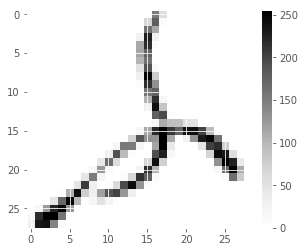

In [32]:
plt.figure()
plt.imshow(x_test[number], cmap='Greys')
plt.colorbar()
plt.show()

In [27]:

rand_value = np.random.randint(len(y_test), size=100).tolist()

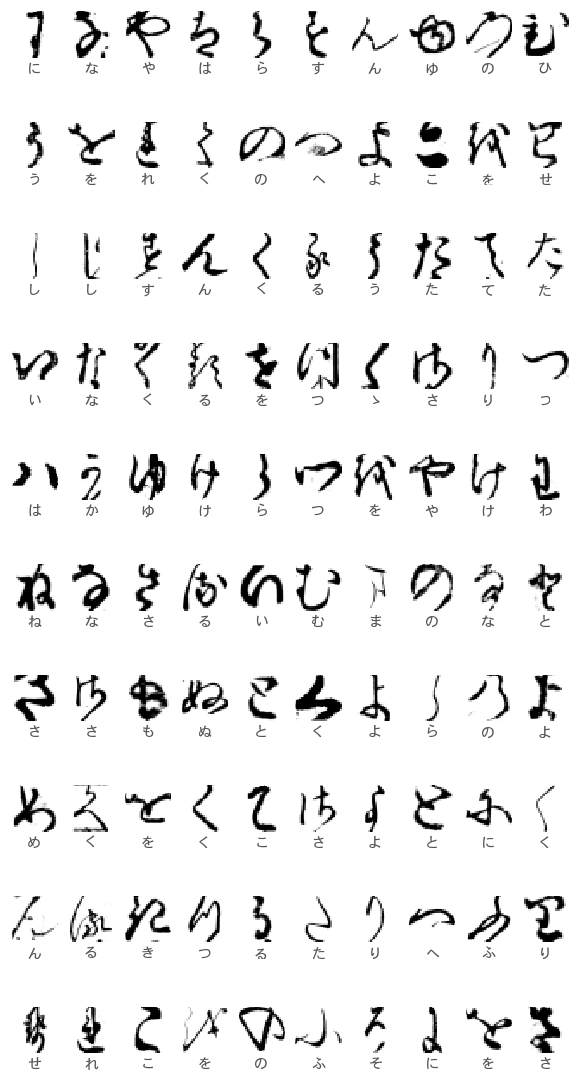

In [32]:
plt.figure(figsize=(10,20))

for i, idx in enumerate(rand_value) :
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.xlabel(labels[y_test[idx]],  fontproperties=fp)
plt.show()